# Homework 3
## Package Import and Data Processing

In [1]:
import numpy as np
import pandas as pd
from sklearn import model_selection
from sklearn import metrics
from sklearn.linear_model import Perceptron
import torch
from torch import nn, optim
from IPython import display
from imblearn.under_sampling import RandomUnderSampler
import matplotlib.pyplot as plt

df = pd.read_csv('diabetes.csv')
X = df.iloc[:, 1:]
X_num = X[['BMI', 'MentalHealth', 'PhysicalHealth', 'AgeBracket', 'IncomeBracket']]
X_norm = (X_num - X_num.mean())/X_num.std()
X_other = X.drop(['BMI', 'MentalHealth', 'PhysicalHealth', 'AgeBracket', 'IncomeBracket'], axis=1)
X = pd.concat([X_norm, X_other], axis=1, join='inner')
Y = df['Diabetes']
df = pd.concat([Y, X], axis=1, join='inner')

## Question 1
*Build and train a Perceptron (one input layer, one output layer, no hidden layers and no activation functions) to classify diabetes from the rest of the dataset. What is the AUC of this model?*

In [63]:
X_train, X_val, Y_train, Y_val = model_selection.train_test_split(X, Y, test_size = 0.3, random_state = 981)
clf = Perceptron(tol=1e-3, random_state=0).fit(X_train,Y_train)
Y_pred = clf.decision_function(X_val)
fpr, tpr, threshold = metrics.roc_curve(Y_val, Y_pred)
auc_perceptron = metrics.auc(fpr, tpr)
print("The AUC of a Perceptron is:", auc_perceptron)

The AUC of a Perceptron is: 0.7817300866524691


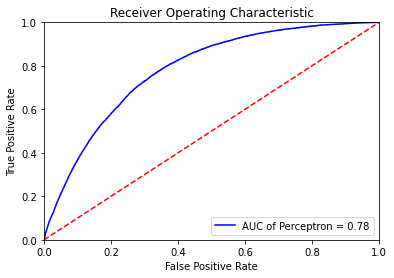

In [64]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC of Perceptron = %0.2f' % auc_perceptron)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

* In the code, I first split dataset into training sets and testing sets. Then, I built a perceptron using sklearn. Then, I use metrics to calculate the AUC and plot the ROC curve out.
* As the question asks me to build and train a perceptron and find AUC of this model, what I did is just following these steps.
* The AUC of Perceptron is around 0.78173. The ROC curve is shown above.
* The AUC of Perceptron is pretty good, which indicates that a Perceptron (one input layer, one output layer, no hidden layers and no activation functions) could be used as a model to classify diabetes.

## Question 2
*Build and train a feedforward neural network with at least one hidden layer to classify diabetes from the rest of the dataset. Make sure to try different numbers of hidden layers and different activation functions (at a minimum reLU and sigmoid). Doing so: How does AUC vary as a function of the number of hidden layers and is it dependent on the kind of activation function used (make sure to include “no activation function” in your comparison). How does this network perform relative to the Perceptron?*

In [2]:
learning_rate = 1e-1
lambda_l2 = 1e-5
D = 21
C = 2
H = 20

ros = RandomUnderSampler()
X, Y = ros.fit_resample(X, Y)

X_train, X_val, Y_train, Y_val = model_selection.train_test_split(X, Y, test_size = 0.3, random_state = 981)
X_train_tensor = torch.tensor(X_train.astype(np.float32).values)
X_val_tensor = torch.tensor(X_val.astype(np.float32).values)
Y_train_tensor = torch.tensor(Y_train.values)
Y_val_tensor = torch.tensor(Y_val.values)

In [90]:
model = nn.Sequential(
    nn.Linear(D, H),
    nn.Linear(H, H),
    nn.Linear(H, C)
)
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, weight_decay=lambda_l2)
for t in range(1000):
    y_pred = model(X_train_tensor)
    loss = criterion(y_pred, Y_train_tensor)
    score, predicted = torch.max(y_pred, 1)
    acc = (Y_train_tensor == predicted).sum().float() / len(Y_train_tensor)
    print("[EPOCH]: %i, [LOSS]: %.6f, [ACCURACY]: %.3f" % (t, loss.item(), acc))
    display.clear_output(wait=True)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
Y_pred = model(X_val_tensor)
fpr, tpr, threshold = metrics.roc_curve(Y_val, Y_pred.detach().numpy()[:,1])
auc = metrics.auc(fpr, tpr)
print("The AUC of Neural Network with one hidden layer and no activation function is:", auc)

The AUC of Neural Network with one hidden layer and no activation function is: 0.8184289752397834


In [83]:
model = nn.Sequential(
    nn.Linear(D, H),
    nn.ReLU(),
    nn.Linear(H, C)
)
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, weight_decay=lambda_l2)
for t in range(1000):
    y_pred = model(X_train_tensor)
    loss = criterion(y_pred, Y_train_tensor)
    score, predicted = torch.max(y_pred, 1)
    acc = (Y_train_tensor == predicted).sum().float() / len(Y_train_tensor)
    print("[EPOCH]: %i, [LOSS]: %.6f, [ACCURACY]: %.3f" % (t, loss.item(), acc))
    display.clear_output(wait=True)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
Y_pred = model(X_val_tensor)
fpr_relu_one, tpr_relu_one, threshold = metrics.roc_curve(Y_val, Y_pred.detach().numpy()[:,1])
auc_relu_one = metrics.auc(fpr_relu_one, tpr_relu_one)
print("The AUC of Neural Network with one hidden layer and ReLU as activation function is:", auc_relu_one)

The AUC of Neural Network with one hidden layer and ReLU as activation function is: 0.8187577279657345


In [84]:
model = nn.Sequential(
    nn.Linear(D, H),
    nn.ReLU(),
    nn.Linear(H, H),
    nn.ReLU(),
    nn.Linear(H, C)
)
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, weight_decay=lambda_l2)
for t in range(1000):
    y_pred = model(X_train_tensor)
    loss = criterion(y_pred, Y_train_tensor)
    score, predicted = torch.max(y_pred, 1)
    acc = (Y_train_tensor == predicted).sum().float() / len(Y_train_tensor)
    print("[EPOCH]: %i, [LOSS]: %.6f, [ACCURACY]: %.3f" % (t, loss.item(), acc))
    display.clear_output(wait=True)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
Y_pred = model(X_val_tensor)
fpr_relu_two, tpr_relu_two, threshold = metrics.roc_curve(Y_val, Y_pred.detach().numpy()[:,1])
auc_relu_two = metrics.auc(fpr_relu_two, tpr_relu_two)
print("The AUC of Neural Network with three hidden layers and ReLU as activation function is:", auc_relu_two)

The AUC of Neural Network with three hidden layers and ReLU as activation function is: 0.8202640373563199


In [85]:
model = nn.Sequential(
    nn.Linear(D, H),
    nn.ReLU(),
    nn.Linear(H, H),
    nn.ReLU(),
    nn.Linear(H, H),
    nn.ReLU(),
    nn.Linear(H, C)
)
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, weight_decay=lambda_l2)
for t in range(1000):
    y_pred = model(X_train_tensor)
    loss = criterion(y_pred, Y_train_tensor)
    score, predicted = torch.max(y_pred, 1)
    acc = (Y_train_tensor == predicted).sum().float() / len(Y_train_tensor)
    print("[EPOCH]: %i, [LOSS]: %.6f, [ACCURACY]: %.3f" % (t, loss.item(), acc))
    display.clear_output(wait=True)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
Y_pred = model(X_val_tensor)
fpr_relu_three, tpr_relu_three, threshold = metrics.roc_curve(Y_val, Y_pred.detach().numpy()[:,1])
auc_relu_three = metrics.auc(fpr_relu_three, tpr_relu_three)
print("The AUC of Neural Network with five hidden layers and ReLU as activation function is:", auc_relu_three)

The AUC of Neural Network with five hidden layers and ReLU as activation function is: 0.8215766559729653


In [86]:
model = nn.Sequential(
    nn.Linear(D, H),
    nn.Sigmoid(),
    nn.Linear(H, C),
)
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, weight_decay=lambda_l2) 
for t in range(1000):
    y_pred = model(X_train_tensor)
    loss = criterion(y_pred, Y_train_tensor)
    score, predicted = torch.max(y_pred, 1)
    acc = (Y_train_tensor == predicted).sum().float() / len(Y_train_tensor)
    print("[EPOCH]: %i, [LOSS]: %.6f, [ACCURACY]: %.3f" % (t, loss.item(), acc))
    display.clear_output(wait=True)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()    
Y_pred = model(X_val_tensor)
fpr_sig_one, tpr_sig_one, threshold = metrics.roc_curve(Y_val, Y_pred.detach().numpy()[:,1])
auc_sig_one = metrics.auc(fpr_sig_one, tpr_sig_one)
print("The AUC of Neural Network with one hidden layer and Sigmoid as activation function is:", auc_sig_one)

The AUC of Neural Network with one hidden layer and Sigmoid as activation function is: 0.8192853251102687


In [87]:
model = nn.Sequential(
    nn.Linear(D, H),
    nn.Sigmoid(),
    nn.Linear(H, H),
    nn.Sigmoid(),
    nn.Linear(H, C),
)
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, weight_decay=lambda_l2)
for t in range(1000):
    y_pred = model(X_train_tensor)
    loss = criterion(y_pred, Y_train_tensor)
    score, predicted = torch.max(y_pred, 1)
    acc = (Y_train_tensor == predicted).sum().float() / len(Y_train_tensor)
    print("[EPOCH]: %i, [LOSS]: %.6f, [ACCURACY]: %.3f" % (t, loss.item(), acc))
    display.clear_output(wait=True)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()  
Y_pred = model(X_val_tensor)
fpr_sig_two, tpr_sig_two, threshold = metrics.roc_curve(Y_val, Y_pred.detach().numpy()[:,1])
auc_sig_two = metrics.auc(fpr_sig_two, tpr_sig_two)
print("The AUC of Neural Network with three hidden layers and Sigmoid as activation function is:", auc_sig_two)

The AUC of Neural Network with three hidden layers and Sigmoid as activation function is: 0.8043591118282638


In [88]:
model = nn.Sequential(
    nn.Linear(D, H),
    nn.Sigmoid(),
    nn.Linear(H, H),
    nn.Sigmoid(),
    nn.Linear(H, H),
    nn.Sigmoid(),
    nn.Linear(H, C),
)
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, weight_decay=lambda_l2)
for t in range(1000):
    y_pred = model(X_train_tensor)
    loss = criterion(y_pred, Y_train_tensor)
    score, predicted = torch.max(y_pred, 1)
    acc = (Y_train_tensor == predicted).sum().float() / len(Y_train_tensor)
    print("[EPOCH]: %i, [LOSS]: %.6f, [ACCURACY]: %.3f" % (t, loss.item(), acc))
    display.clear_output(wait=True)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()  
Y_pred = model(X_val_tensor)
fpr_sig_three, tpr_sig_three, threshold = metrics.roc_curve(Y_val, Y_pred.detach().numpy()[:,1])
auc_sig_three = metrics.auc(fpr_sig_three, tpr_sig_three)
print("The AUC of Neural Network with five hidden layers and Sigmoid as activation function is:", auc_sig_three)

The AUC of Neural Network with five hidden layers and Sigmoid as activation function is: 0.7368810685110578


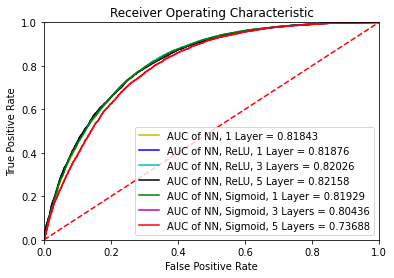

In [95]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'y', label = 'AUC of NN, 1 Layer = %0.5f' % auc)
plt.plot(fpr_relu_one, tpr_relu_one, 'b', label = 'AUC of NN, ReLU, 1 Layer = %0.5f' % auc_relu_one)
plt.plot(fpr_relu_two, tpr_relu_two, 'c', label = 'AUC of NN, ReLU, 3 Layers = %0.5f' % auc_relu_two)
plt.plot(fpr_relu_one, tpr_relu_one, 'k', label = 'AUC of NN, ReLU, 5 Layer = %0.5f' % auc_relu_three)
plt.plot(fpr_sig_one, tpr_sig_one, 'g', label = 'AUC of NN, Sigmoid, 1 Layer = %0.5f' % auc_sig_one)
plt.plot(fpr_sig_two, tpr_sig_two, 'm', label = 'AUC of NN, Sigmoid, 3 Layers = %0.5f' % auc_sig_two)
plt.plot(fpr_sig_two, tpr_sig_two, 'r', label = 'AUC of NN, Sigmoid, 5 Layers = %0.5f' % auc_sig_three)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

* In the first section, I use an undersampler to make the data balance. In the second section, I huild and train a neural network model with one hidden layer, using no activation function. In the third to fifth section, I build and train neural network models with one hidden layer, three hidden layers, and five hidden layers, using ReLU as activation function. In the sixth section to eighth section, I build and train neural network models with one hidden layer, three hidden layers, and five hidden layers, using Sigmoid as activation function. In the last section, I plot out the ROC curve of each models above.
* First I find that data imbalance exists. That is to say, the distribution of outcome values is highly skewed, the number of one outcome is hugely over the number of the other outcome. This affects the model performance and I solve it using an undersampler that makes the data balance. Then we need to evaluate model performance is two dimensions: different numbers of hidden layers and different activation functions, so I make different models with different numbers of hidden layers and different activation functions to make the comparison.
* Obeservations:
    * The AUC of model with 1 hidden layer and no activation function is around 0.81843
    * The AUC of model with 1 hidden layer and ReLU activation function is around 0.81876
    * The AUC of model with 3 hidden layers and ReLU activation function is around 0.82026
    * The AUC of model with 5 hidden layers and ReLu activation function is around 0.82158
    * The AUC of model with 1 hidden layer and Sigmoid activation function is around 0.81929
    * The AUC of model with 3 hidden layers and Sigmoid activation function is around 0.80436
    * The AUC of model with 5 hidden layers and Sigmoid activation function is around 0.73688
    * The AUC of model with 1 hidden layers and no activation function is higher than a Perceptron.
    * The AUC of model using ReLU increase as the number of hidden layers increases.
    * The AUC of model using Sigmoid decrease as the number of hidden layers increases.
    * For all models with 1 hidden layer, AUC of the one with no activation function < AUC of the one with Sigmoid activation function < AUC of the one with ReLU activation function 
* Including hidden layer(s) may make the model perform better, as in some cases, AUC increase (ReLU example). However, sometimes adding too many layers might negtively impact the model performance, such as the Sigmoid example. This might be due to overfitting. With one hidden layer using no activation function, Sigmoid, or ReLU, the model performance becomes better than perceptron.

## Question 3
*Build and train a “deep” network (at least 2 hidden layers) to classify diabetes from the rest of the dataset. Given the nature of this dataset, is there a benefit of using a CNN or RNN for the classification?*

In [98]:
model = nn.Sequential(
    nn.Linear(D, H),
    nn.ReLU(),
    nn.Linear(H, H),
    nn.ReLU(),
    nn.Linear(H, H),
    nn.ReLU(),
    nn.Linear(H, H),
    nn.ReLU(),
    nn.Linear(H, C),
)
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, weight_decay=lambda_l2)
for t in range(1000):
    y_pred = model(X_train_tensor)
    loss = criterion(y_pred, Y_train_tensor)
    score, predicted = torch.max(y_pred, 1)
    acc = (Y_train_tensor == predicted).sum().float() / len(Y_train_tensor)
    print("[EPOCH]: %i, [LOSS]: %.6f, [ACCURACY]: %.3f" % (t, loss.item(), acc))
    display.clear_output(wait=True)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
Y_pred = model(X_val_tensor)
fpr, tpr, threshold = metrics.roc_curve(Y_val, Y_pred.detach().numpy()[:,1])
auc_nn = metrics.auc(fpr, tpr)
print("The AUC of Neural Network with seven hidden layers and ReLU as activation function is:", auc_nn)

The AUC of Neural Network with seven hidden layers and ReLU as activation function is: 0.8230181112590503


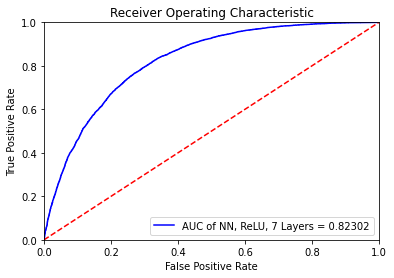

In [100]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC of NN, ReLU, 7 Layers = %0.5f' % auc_nn)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

* In the code, I build and train a severn-hidden-layer "deep" neural network model, find its AUC and plot its ROC curve.
* The question requires me to build and train a neural network model with at least 2 hidden layers. I already built several "deep" neural network models in the previous question, so I build a deeper one in this question and find its AUC.
* The AUC of Neural Network with seven hidden layers and ReLU as activation function is around 0.82302, which performs best so far.
* For this dataset, I think using CNN is a better choice than using RNN. We are doing binary classification in this question and most of our predictors are binary data (0 and 1), which could be a usage scenario for CNN. Also, the sizes of input data and output data are fixed, and there is no temporal or sequential data, which means we do not need to do recurring. Thus, CNN is a better choice for this data set. However, both CNN and RNN have their own more suitible usage scenario. For example, using CNN for image classification and recogination, and using RNN for speech data and video data. There are better options other than CNN and RNN.

## Question 4
*Build and train a feedforward neural network with one hidden layer to predict BMI from the rest of the dataset. Use RMSE to assess the accuracy of your model. Does the RMSE depend on the activation function used?*

In [101]:
X = df.drop(['BMI'], axis=1)
Y = df['BMI']
X_train, X_val, Y_train, Y_val = model_selection.train_test_split(X, Y, test_size = 0.3, random_state = 981)
X_train_tensor = torch.tensor(X_train.astype(np.float32).values)
X_val_tensor = torch.tensor(X_val.astype(np.float32).values)
Y_train_tensor = torch.from_numpy(Y_train.values).reshape([len(Y_train.values),1])
Y_val_tensor = torch.from_numpy(Y_val.values).reshape([len(Y_val.values),1])
D = 21
C = 1
H = 20
learning_rate = 1e-3
lambda_l2 = 1e-5

In [106]:
model = nn.Sequential(
    nn.Linear(D, H),
    nn.Linear(H, H),
    nn.Linear(H, C)
)
criterion = torch.nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, weight_decay=lambda_l2)
for t in range(1000):
    y_pred = model(X_train_tensor.float())
    loss = torch.sqrt(criterion(y_pred.float(), Y_train_tensor.float()))
    print("[EPOCH]: %i, [LOSS or RMSE]: %.6f" % (t, loss.item()))
    display.clear_output(wait=True)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

[EPOCH]: 999, [LOSS or RMSE]: 0.969988


In [103]:
model = nn.Sequential(
    nn.Linear(D, H),
    nn.Sigmoid(),
    nn.Linear(H, C)
)
criterion = torch.nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, weight_decay=lambda_l2)
for t in range(1000):
    y_pred = model(X_train_tensor.float())
    loss = torch.sqrt(criterion(y_pred.float(), Y_train_tensor.float()))
    print("[EPOCH]: %i, [LOSS or RMSE]: %.6f" % (t, loss.item()))
    display.clear_output(wait=True)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

[EPOCH]: 999, [LOSS or RMSE]: 1.002501


In [104]:
model = nn.Sequential(
    nn.Linear(D, H),
    nn.ReLU(),
    nn.Linear(H, C)
)
criterion = torch.nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, weight_decay=lambda_l2)
for t in range(1000):
    y_pred = model(X_train_tensor.float())
    loss = torch.sqrt(criterion(y_pred.float(), Y_train_tensor.float()))
    print("[EPOCH]: %i, [LOSS or RMSE]: %.6f" % (t, loss.item()))
    display.clear_output(wait=True)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

[EPOCH]: 999, [LOSS or RMSE]: 0.974209


* In the first section, I split the data into training set and testing set for BMI prediction. Then, I build four neural network models, each with one hidden layer but with different activation functions: no activation function, Sigmoid, and ReLU. For each model, I calculate the RMSE after 1000 traing loops.
* Building models with/without or with different activation functions and find corresponding RMSE can tell the performance of model and if RMSE depends on activation functions. The lower the RMSE, the less errors will happen, the more accurate the model. 
* Observation:
    * The RMSE of the model with one hidden layer with no activation function is 0.969988.
    * The RMSE of the model with one hidden layer with Sigmoid activation function is 1.002501.
    * The RMSE of the model with one hidden layer with ReLU activation function is 0.974209.
* The model without activation function has the highest RMSE, which means the higest accuracy. Using ReLU as activation function slighly increases the RMSE. Using Sigmoid increases more RMSE. The activation function used will influnce RMSE. But it is hard to say if RMSE depends on the activation function since "depends" indicates a pretty strong correlation, which is not that obvious from my comparison.

## Question 5
*Build and train a neural network of your choice to predict BMI from the rest of your dataset. How low can you get RMSE and what design choices does RMSE seem to depend on?*

In [135]:
learning_rate = 1e-2
lambda_l2 = 1e-2
model = nn.Sequential(
    nn.Linear(D, H),
    nn.ReLU(),
    nn.Linear(H, C)
)
criterion = torch.nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, weight_decay=lambda_l2)

for t in range(1000):
    y_pred = model(X_train_tensor.float())
    loss = torch.sqrt(criterion(y_pred.float(), Y_train_tensor.float()))
    print("[EPOCH]: %i, [LOSS or RMSE]: %.6f" % (t, loss.item()))
    display.clear_output(wait=True)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

[EPOCH]: 999, [LOSS or RMSE]: 0.932307


* I alter the learning rate and weight decay and build a neural network model with one hidden layer and using ReLU activation function.
* I guess other than activation function used, the number of hidden layers, learning rate and weight decay could be the factors affect the RMSE. Therefore, I tried different models with different structures and numbers. Finally, I keep the one with the lowest RMSE.
* The model with one hidden layer and ReLU as activation function with learning rate 0.01 and weight decay 0.01 has RMSE 0.932307.
* The lowest RMSE I can get is 0.932307.

## Extra 1

In [138]:
df = pd.read_csv('diabetes.csv')
X = df.iloc[:, 1:]
X_num = X[['BMI', 'MentalHealth', 'PhysicalHealth', 'AgeBracket', 'IncomeBracket']]
X_norm = (X_num - X_num.mean())/X_num.std()
X_other = X.drop(['BMI', 'MentalHealth', 'PhysicalHealth', 'AgeBracket', 'IncomeBracket'], axis=1)
X = pd.concat([X_norm, X_other], axis=1, join='inner')
Y = df['Diabetes']

In [149]:
learning_rate = 1e-1
lambda_l2 = 1e-5
D = 21
C = 2
H = 20

ros = RandomUnderSampler()
X, Y = ros.fit_resample(X, Y)

X_train, X_val, Y_train, Y_val = model_selection.train_test_split(X, Y, test_size = 0.3, random_state = 981)
X_train_tensor = torch.tensor(X_train.astype(np.float32).values)
X_val_tensor = torch.tensor(X_val.astype(np.float32).values)
Y_train_tensor = torch.tensor(Y_train.values)
Y_val_tensor = torch.tensor(Y_val.values)

model = nn.Sequential(
    nn.Linear(D, H),
    nn.Linear(H, C)
)
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, weight_decay=lambda_l2)
for t in range(100):
    y_pred = model(X_train_tensor)
    loss = criterion(y_pred, Y_train_tensor)
    score, predicted = torch.max(y_pred, 1)
    acc = (Y_train_tensor == predicted).sum().float() / len(Y_train_tensor)
    print("[EPOCH]: %i, [LOSS]: %.6f, [ACCURACY]: %.3f" % (t, loss.item(), acc))
    display.clear_output(wait=True)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
Y_pred = model(X_val_tensor)
fpr, tpr, threshold = metrics.roc_curve(Y_val, Y_pred.detach().numpy()[:,1])
auc = metrics.auc(fpr, tpr)
print("The AUC of Neural Network with one hidden layer and no activation function is:", auc)

The AUC of Neural Network with one hidden layer and no activation function is: 0.805064009467054


In [150]:
for i in range(len(X.columns)):
    D = 20
    X_train_new = X_train.drop(X_train.columns[i], axis = 1)
    X_val_new = X_val.drop(X_val.columns[i], axis = 1)   
    X_train_tensor_new = torch.tensor(X_train_new.astype(np.float32).values)
    X_val_tensor_new = torch.tensor(X_val_new.astype(np.float32).values)

    model = nn.Sequential(
    nn.Linear(D, H),
    nn.Linear(H, C)
    )
    criterion = torch.nn.CrossEntropyLoss()
    optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, weight_decay=lambda_l2)
    for t in range(100):
        y_pred = model(X_train_tensor_new)
        loss = criterion(y_pred, Y_train_tensor)
        score, predicted = torch.max(y_pred, 1)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    Y_pred = model(X_val_tensor_new)
    fpr, tpr, threshold = metrics.roc_curve(Y_val, Y_pred.detach().numpy()[:,1])
    auc = metrics.auc(fpr, tpr)
    print('{:67s}{:.5f}'.format('AUC of model with {} dropped is: '.format(X_train.columns[i]), auc))

AUC of model with BMI dropped is:                                  0.78091
AUC of model with MentalHealth dropped is:                         0.79715
AUC of model with PhysicalHealth dropped is:                       0.80829
AUC of model with AgeBracket dropped is:                           0.79778
AUC of model with IncomeBracket dropped is:                        0.81010
AUC of model with HighBP dropped is:                               0.78351
AUC of model with HighChol dropped is:                             0.78729
AUC of model with Smoker dropped is:                               0.75545
AUC of model with Stroke dropped is:                               0.79652
AUC of model with Myocardial dropped is:                           0.79497
AUC of model with PhysActivity dropped is:                         0.80185
AUC of model with Fruit dropped is:                                0.80725
AUC of model with Vegetables dropped is:                           0.79169
AUC of model with HeavyDr

* In the code, I first build a neural network model with no hidden layer or activation function and find its AUC. Then I dropped each columns and find different model's AUC.
* By comparing the AUC change, we could tell which predictor has what kind of impact to the model.
* Every predictors have impact on the model more or less, but some of them have very minor impact. They are: Fruit, HasHealthcare, NotAbleToAffordDoctor, EducationBracket and Zodiac.
* The predictors that have effectively no impact are Fruit, HasHealthcare, NotAbleToAffordDoctor, EducationBracket and Zodiac.

# Extra 2

* Pro:
    * Neural network models can be built in a shorter time compared to the classical methods in the previous homework.
    * The AUC of neural network models are slightly higher than AUC of the classical methods.
    * Neural network model could be used for classification and prediction. Most of the classical method can only do one thing, either classification or prediction.
* Cons:
    * Problems like exploding gradient or vanishing gradient might occur.
    * It is less "meaningful" compared to the classical methods I used in the last homework. More stuffs are in the black box.
* Overall:
    * There is no overall answer that which model is always better than the others. It is necessary to examine the data carefully before choosing which model to build and the results from the models.